In [1]:
import pandas as pd
import requests
from io import StringIO
import matplotlib.pyplot as plt

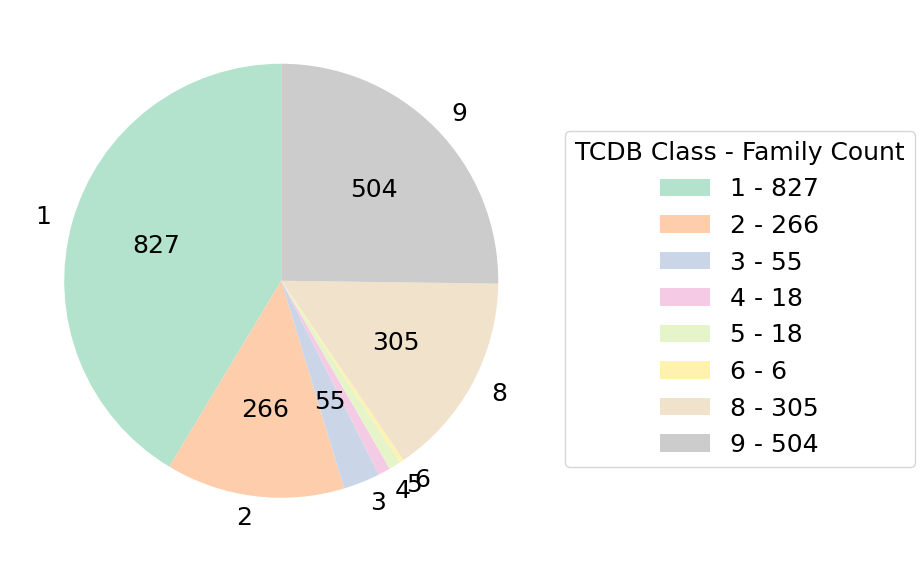

In [2]:
tcdb_family_url = "https://www.tcdb.org/cgi-bin/projectv/public/families.py"

def fetch_data(url):
    response = requests.get(url)
    response.raise_for_status()
    return response.text

def parse_data(data):
    lines = data.strip().split("\n")
    tc_data = []
    for line in lines:
        tc_fam, name = line.split("\t")
        tc_data.append([tc_fam, name])
    df = pd.DataFrame(tc_data, columns=["TC Number", "Family Name"])

    return df

df = parse_data(fetch_data(tcdb_family_url))

df['First Digit'] = df['TC Number'].str[0]

count = df['First Digit'].value_counts().sort_index()

def func(pct, allvalues):
    absolute = int(round(pct / 100 * sum(allvalues), 0))
    return f'{absolute}'

plt.figure(figsize=(7, 10))
ax = count.plot(kind='pie', autopct=lambda pct: func(pct, count) if pct > 1 else '',
                colors=plt.cm.Pastel2.colors, startangle=90, legend=False,
                textprops={'fontsize': 18}, labeldistance=1.1) 

handles, labels = ax.get_legend_handles_labels()
count_values = count
legend_labels = [f'{label} - {count_values[label]}' for label in labels]
ax.legend(handles, legend_labels, title='TCDB Class - Family Count',
          loc='upper left', fontsize=18, bbox_to_anchor=(1, 0.8), title_fontsize=18)

plt.ylabel('')

plt.show()

In [2]:
tcdb_all_transporters = "https://www.tcdb.org/cgi-bin/substrates/listSuperfamilies.py"

def fetch_data(url):
    response = requests.get(url)
    response.raise_for_status()
    return response.text

def parse_data(data):
    lines = data.strip().split("\n")
    tc_numbers = [line.split("\t")[0] for line in lines]
    df = pd.DataFrame(tc_numbers, columns=["TC Number"])
    return df

df = parse_data(fetch_data(tcdb_all_transporters))

df['Starts With'] = df['TC Number'].str[0]
count = df['Starts With'].value_counts().sort_index()

print(count)
df

Starts With
#       1
1    3724
2    3691
3    1543
4     206
5     120
8     600
9    1163
Name: count, dtype: int64


,TC Number,Starts With
0,#TCID,#
1,1.A.1.1.1,1
2,1.A.1.10.1,1
3,1.A.1.10.10,1
4,1.A.1.10.11,1
...,...,...
11043,9.B.97.8.1,9
11044,9.B.97.8.2,9
11045,9.B.97.8.3,9
11046,9.B.97.8.4,9
